In [1]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading libraries from SK-Learn.......
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Loading Ensemble Libraries...
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading Model selection libraries.....
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.....
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_error

# Warnings....
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the excel file....
df=pd.read_excel('electricalenergy.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


## Understanding the data.....                  

1) Features: Features consist of hourly average ambient variables                             
   >> AT: Temperature (T) in the range 1.81°C and 37.11°C                  
   >> AP: Ambient Pressure (AP) in the range 992.89-1033.30 milibar              
   >> RH: Relative Humidity (RH) in the range 25.56% to 100.16%               
   >> V: Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg                
                       
2) Target:                                
   >> PE: Net hourly electrical energy output (EP) 420.26-495.76 MW                          
        
3) We have to predict the Energy Output under given Environment conditions.                        
4) As we see data is continuous thus i will use regression models for model training.        

# EDA (EXPLORATORY DATA  ANALYSIS)

In [3]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 9568 rows and 5 columns.
df.shape

(9568, 5)

In [4]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [5]:
# Checking last few rows...
df.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [6]:
# # Checking the no. of different unique values present in the each Feature of the Dataset......
for i in df.columns.values:
    print('Number of unique values in {} are {} '.format(i,df[i].nunique()))

Number of unique values in AT are 2773 
Number of unique values in V are 634 
Number of unique values in AP are 2517 
Number of unique values in RH are 4546 
Number of unique values in PE are 4836 


In [7]:
# checking the Features information regarding the dataset....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


Features Information:
1) No null data.
2) float datatype= 5

In [8]:
# Checking if the NaN values are dropped or not...
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [9]:
# Statistical Features Information......
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


##### Data is left and right skewed but a little bit. 


In [10]:
# Checking the correlation.....
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


## Univariant Analysis...

AT       AxesSubplot(0.125,0.657941;0.227941x0.222059)
V     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
AP    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
RH       AxesSubplot(0.125,0.391471;0.227941x0.222059)
PE    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

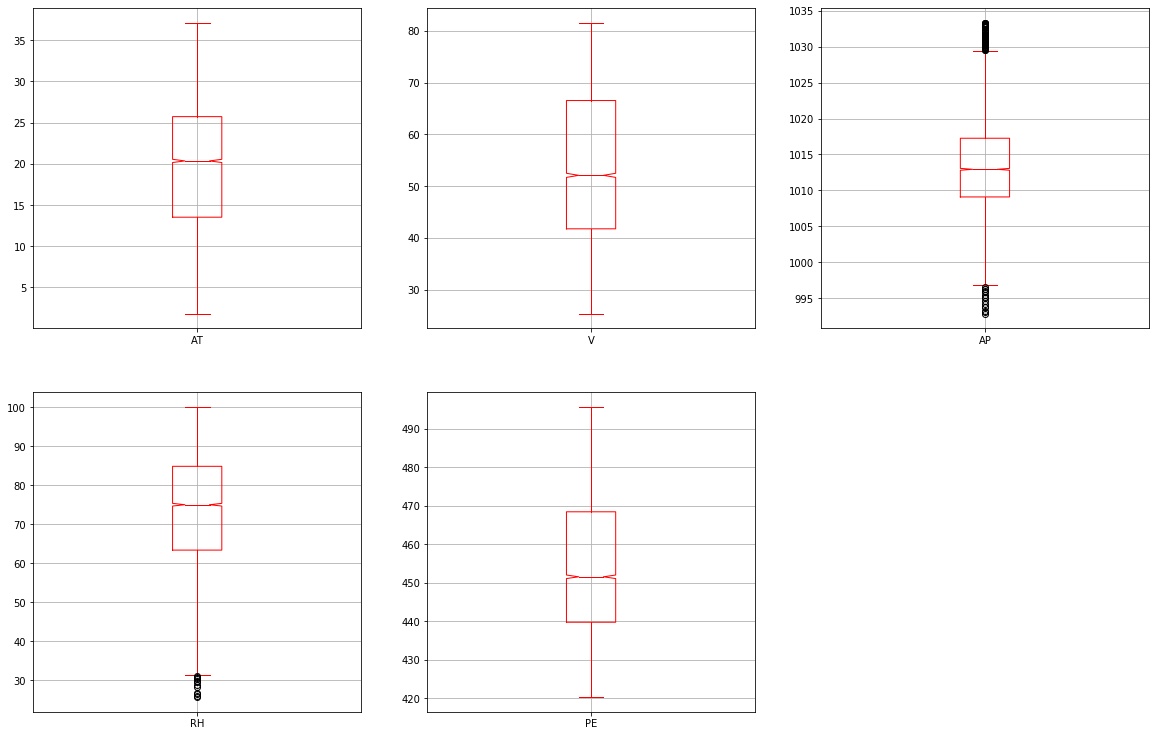

In [11]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(3,3),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

##### Relative humidity and ambient pressure have some outliers...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFEB9B4948>,
      dtype=object)

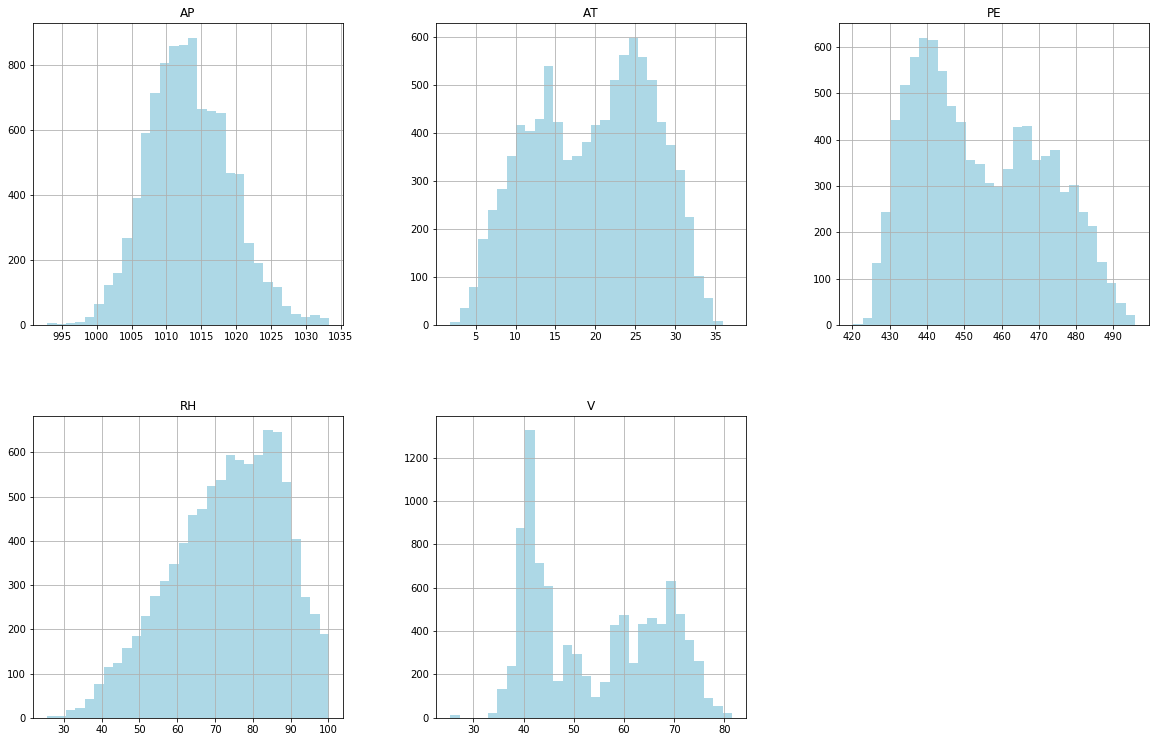

In [12]:
# Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(3,3),bins=30,color='lightblue') 

## Bivariant Graph Analysis

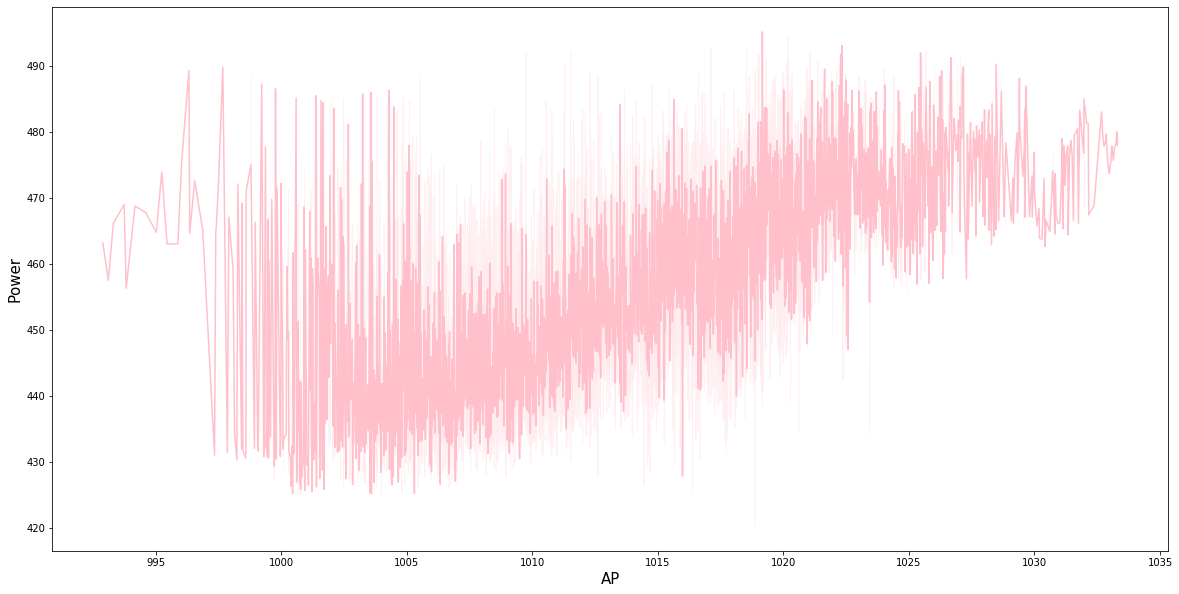

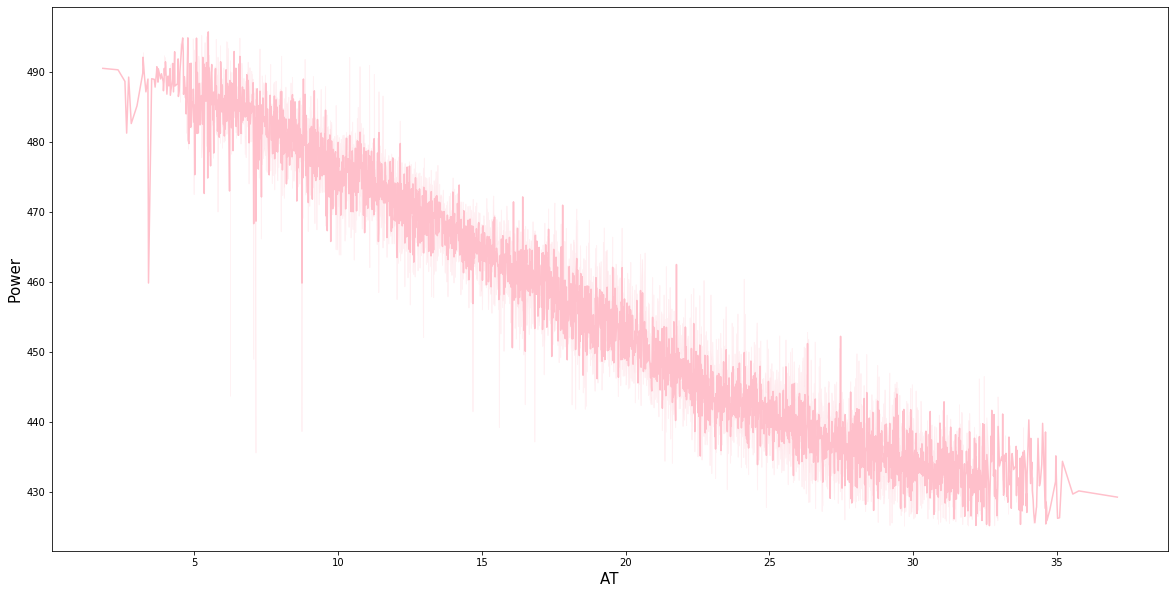

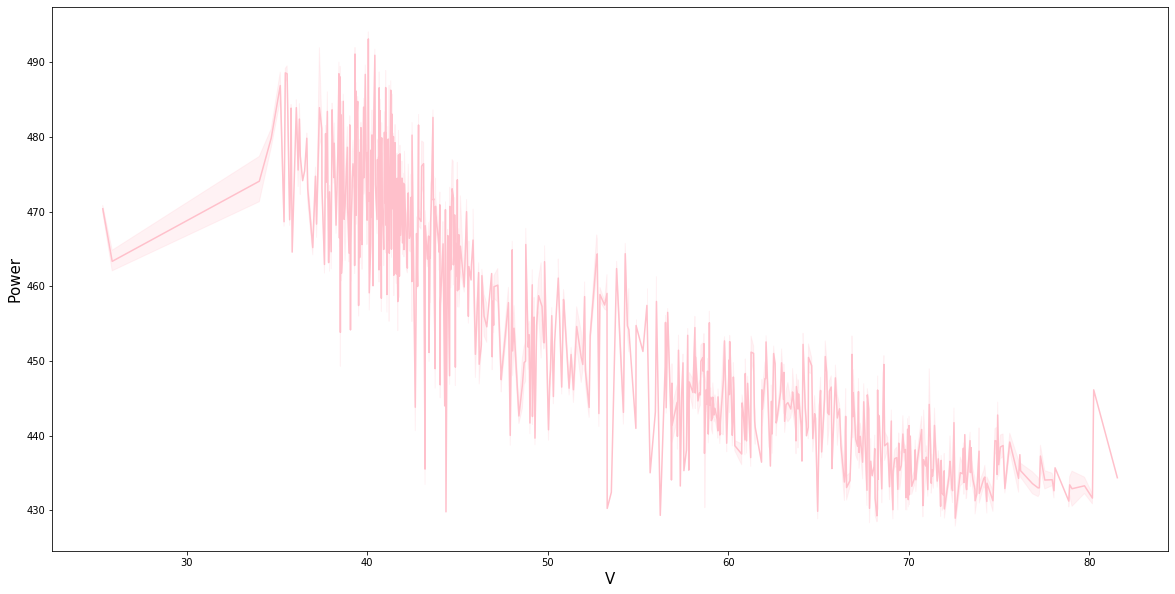

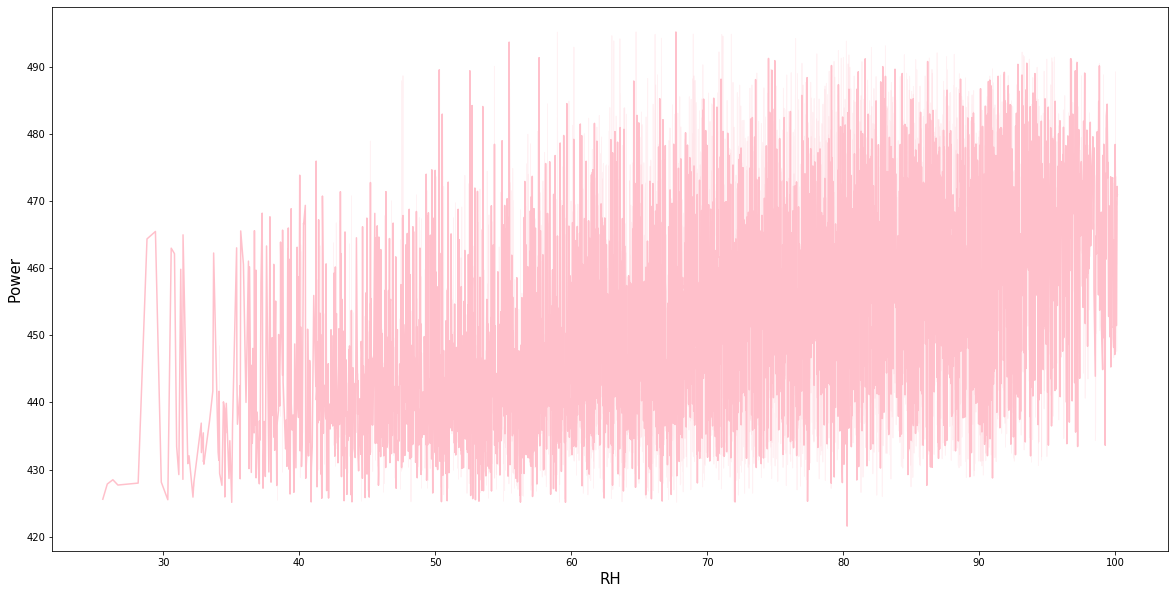

In [13]:
# For loop to plot Different with respect to the Target...
for i in ['AP','AT','V','RH']:
    plt.subplots(figsize=(20,10))
    sns.lineplot(x=i,y='PE',data=df,color='pink')
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Power',fontsize=15)

##### Graph observations:                               

1) As Ambient Pressure increases the Output Energy also increses.                    
2) Increasing in the Temprature will drastically reduse Energy Output.                  
3) Incresing the Exhaust Vaccum level will leads to decrease the output Power.             
4) Incresing Relative Humidity will have a positive effect on Power Output.                

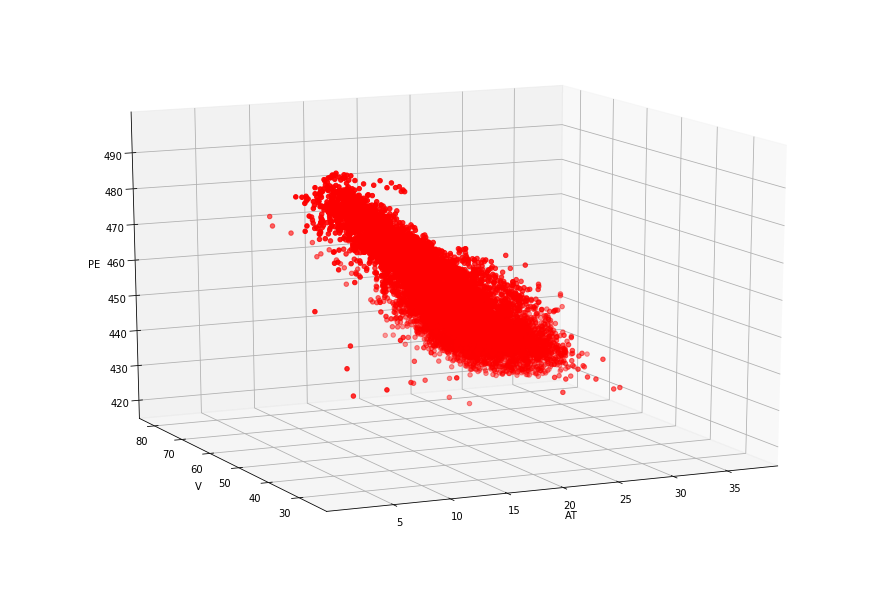

In [14]:
# Plotting the 3D plot between the strongly Correlated Features with the Target Value....
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
ax.scatter(df["AT"], df["V"], df["PE"],color='red')
ax.set_xlabel("AT")
ax.set_ylabel("V")
ax.set_zlabel("PE")
ax.set_facecolor("white")

##### Frome the above graph it is concluded that increasing in the value of Temprature and Exhaust Vaccum, The Power output will decrease.

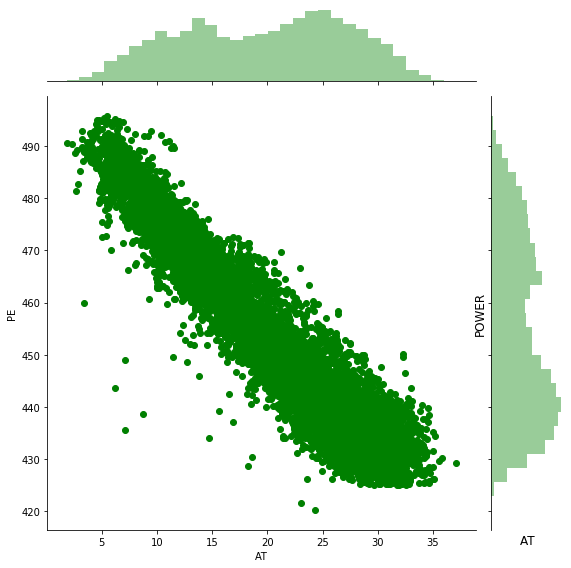

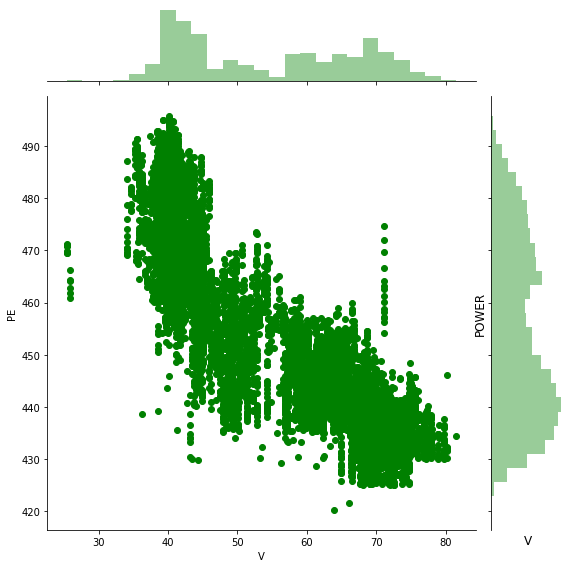

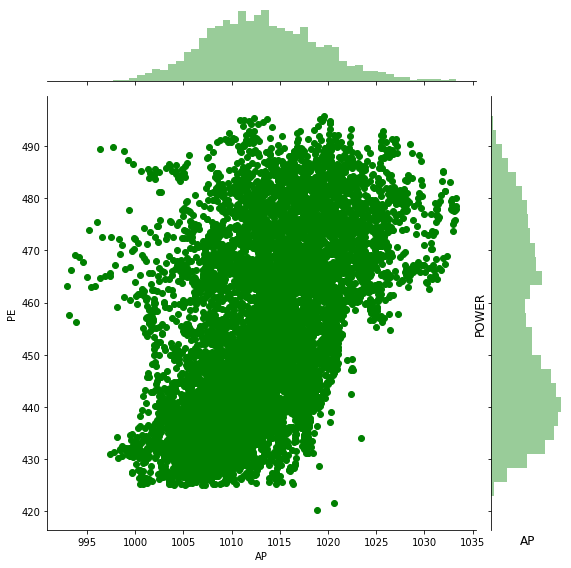

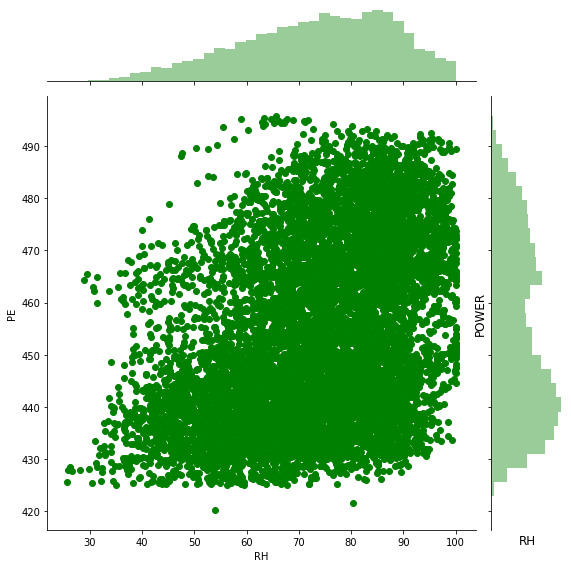

In [15]:
# Checking where the people lives more...
for i in ['AT','V','AP','RH']:
    sns.jointplot(x=i,y='PE',data=df,size=8,color='green')
    plt.ylabel('POWER',fontsize=12)
    plt.xlabel(i,fontsize=12)
    plt.show()
    sns.despine

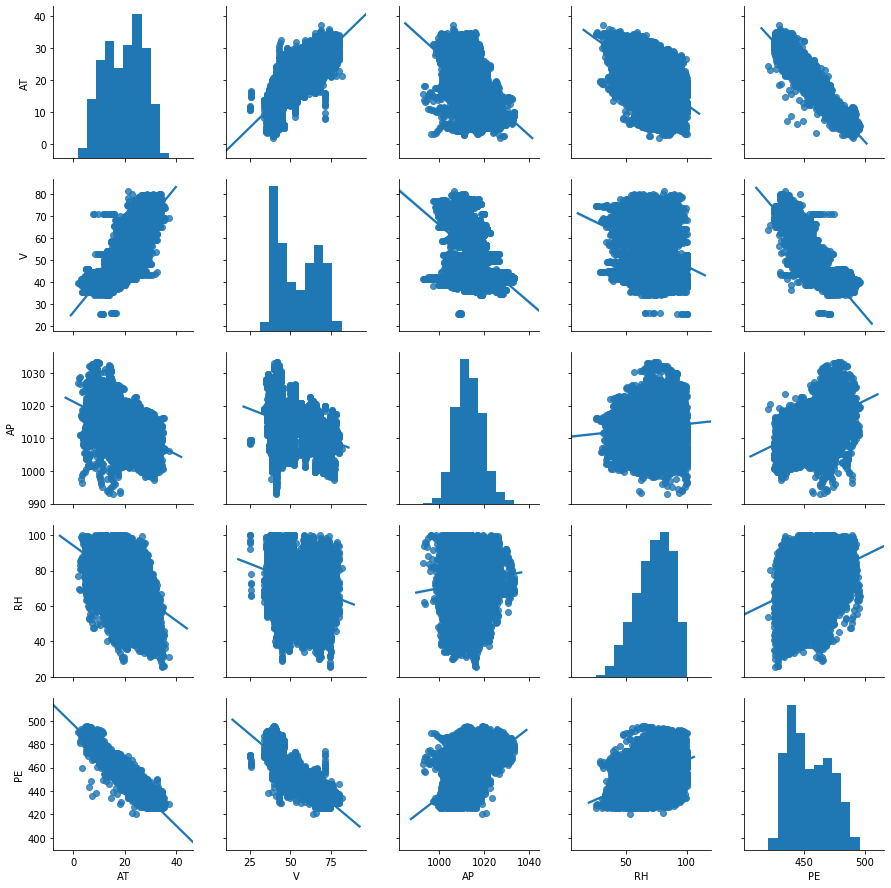

In [16]:
# Visualization of pairplot...
sns.pairplot(df,kind='reg',palette='rainbow')

##### observations
1) There is an approximately linear relationship between PE and the negative of AT(Temprature), V(Exhaust Vaccum)      
2) There is an approximately linear relationship(although it's weak) between PE and RH(Relative Humidity), AP( Ambient Pressure)     

In [17]:
# Checking Skewness....
df.skew()

AT   -0.136393
V     0.198521
AP    0.265445
RH   -0.431839
PE    0.306509
dtype: float64

In [18]:
# Removing Skewness
for i in df.drop(['PE'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [19]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(9568, 5)
(9510, 5)


In [20]:
# Checking Skewness again....
df_new.skew()

AT   -0.145985
V     0.189396
AP    0.204391
RH   -0.418854
PE    0.317465
dtype: float64

In [21]:
# Checking the correlation
df_new.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,AT,V,AP,RH,PE
AT,1,0.84,-0.51,-0.54,-0.95
V,0.84,1,-0.42,-0.31,-0.87
AP,-0.51,-0.42,1,0.11,0.52
RH,-0.54,-0.31,0.11,1,0.39
PE,-0.95,-0.87,0.52,0.39,1


##### Observations:                   
1) Ambient Pressure and Relative humidity have strong positive correlation with the Energy Output.            
2) Exhaust Vaccum and Temprature have very strong negative correlation with the Energy Output.             

(5.0, 0.0)

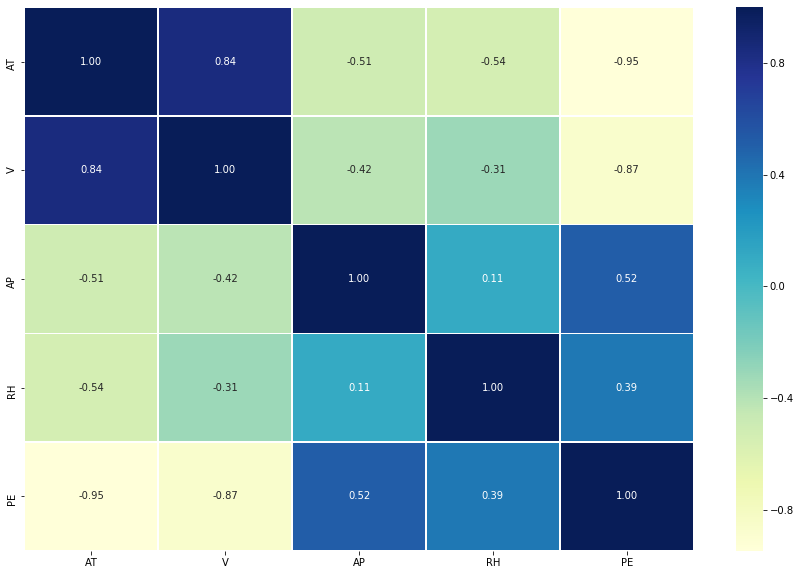

In [22]:
# Plotting Heatmap for Correlation
corr_matrix = df_new.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [23]:
# Dropping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['PE'],axis=1)
x1
print(x1.shape)

(9510, 4)


In [24]:
# Setting up the Target value in variable y.
y=df_new['PE']
y.shape

(9510,)

In [25]:
# scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,AT,V,AP,RH
0,-0.636713,-0.992604,1.878115,-0.010608
1,0.738204,0.676596,1.182318,-0.977361
2,-1.961854,-1.178420,-0.178197,1.290976
3,0.157025,0.232526,-0.509694,0.227479
4,-1.193676,-1.328018,-0.684074,1.598361
...,...,...,...,...
9505,-0.409354,-0.368229,0.141213,1.212758
9506,-0.874835,-1.195742,1.809054,-0.449043
9507,1.564230,1.571822,-0.046980,-2.528009
9508,0.644031,1.187591,0.115315,-0.750253


# Model Training

In [26]:
#...........Function for GridSearch........
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters):
    clf = GridSearchCV(mod,parameters,scoring='r2' ,cv=5)
    clf.fit(x,y)
    print(clf.best_params_)

In [27]:
#.......Grid Search for SVR......
SV=SVR()
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
parameters={'C': Cs, 'gamma' : gammas}
grid_cv(SV,parameters)

{'C': 10, 'gamma': 1}


In [28]:
#........Grid Search for KNeighborsRegressor......
knr=KNeighborsRegressor()
parameters={"n_neighbors":np.arange(1,100)}
grid_cv(knr,parameters)

{'n_neighbors': 5}


In [29]:
#...........Grid Search for Lasso.......
ls=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
grid_cv(ls,parameters)

{'alpha': 0.001}


In [30]:
#..............Grid Search for GradientBoostingRegressor...............
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbr,parameters)

{'learning_rate': 0.1, 'n_estimators': 500}


In [31]:
#.................Grid Search for RandomForestRegressor..........
rf=RandomForestRegressor()
parameters={'n_estimators': [200,500, 700,],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters)

{'max_features': 'sqrt', 'n_estimators': 500}


In [32]:
#.......Gridsearchcv for Ada Boost Regressor...........
ada=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(ada,parameters,)

{'learning_rate': 0.01, 'n_estimators': 500}


In [34]:
#..............Defining Instances For Differnt Models and fitting best parameters found out from grid search........
KNR=KNeighborsRegressor(n_neighbors=5)
SV=SVR(C=10,gamma=1)
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor(max_features='sqrt',n_estimators=500)
GBR=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
ABR=AdaBoostRegressor(learning_rate=0.01,n_estimators=500)
LS=Lasso(alpha=0.001)
RD=Ridge()
EN=ElasticNet()
XGB=XGBRegressor()

In [39]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGB))

In [40]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_r2_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state

In [41]:
Model=[]
Score=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]
MAE=[]
# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
# ...............For Loop to Calculate R_2 Score, Cross Val Score and errors.........
for name, model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_r2_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,)
    model.fit(x_train,y_train)
    score=model.score(x_train, y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
#.........Calculating cross_val_score...........
    cv_score=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
#.......Calculating Mean_square_error..........    
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared Error : ',mse )
    MSE.append(mse*100)
    print('\n')
#.......Calculating.....Root_Mean_square_error.........   
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error : ',rmse )
    RMSE.append(rmse*100)
    print('\n')
#..........Calculating.....Mean_absolute_error.........   
    mae=mean_absolute_error(y_test,y_pred)
    print('Mean Absolute Error : ',mae )
    MAE.append(rmse*100)
    print('\n')

*************************** KNeighborsRegressor *****************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 95 is: 0.9562678921773917
Learning Score :  0.9665513451909905
R2 Score :  0.9562678921773917


Cross Val Score :  0.9502032704145439


Mean Squared Error :  12.712423501577293


Root Mean Squared Error :  3.565448569475837


Mean Absolute Error :  2.647498422712935


*************************** SVR *****************************


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 75 is: 0.9534194709576358
Learning Score :  0.9500312534908995
R2 Score :  0.9534194709576358


Cross Val Score :  0.9467398596771727


Mean Squared Error :  14.114524874092167


Root Mean Squared 

In [42]:
#............. DataFrame to show all the calculated scores in one table........
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'R2_score':R2_score,'Cross_Val_Score':cvs,
                     'Mean_squared_error':MSE,'Root_Mean_squared_error':RMSE,'Mean_absolute_error':MAE})  
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,R2_score,Cross_Val_Score,Mean_squared_error,Root_Mean_squared_error,Mean_absolute_error
0,KNeighborsRegressor,96.6551,95.6268,95.0203,1271.24,356.545,356.545
1,SVR,95.0031,95.3419,94.674,1411.45,375.693,375.693
2,LinearRegression,92.6568,93.432,92.8049,1964.87,443.268,443.268
3,DecisionTreeRegressor,100,94.0831,92.8197,1722.25,415.001,415.001
4,RandomForestRegressor,99.4934,96.9569,96.4312,910.38,301.725,301.725
5,GradientBoostingRegressor,97.1383,96.5196,95.9942,1041.17,322.672,322.672
6,AdaBoostRegressor,91.6821,92.4376,91.7103,2196.88,468.709,468.709
7,Lasso,92.6568,93.4322,92.8049,1964.8,443.26,443.26
8,Ridge,92.6568,93.4308,92.8049,1965.23,443.309,443.309
9,ElasticNet,85.7101,86.5733,85.8715,3910.74,625.359,625.359


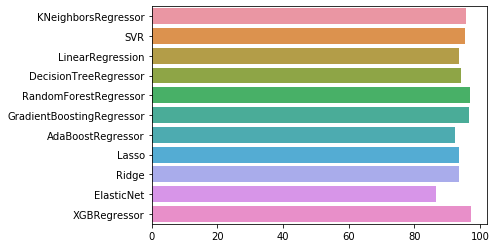

In [43]:
# ..........visualisation of R2 Score using Bar Plot..........
sns.barplot(y=Model,x=R2_score)

### After all this process conclusion is that XGBRegressor is performing better than rest and along with r2_score it's error is better among all...

In [48]:
# Using XGBRegressor for final model...
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=75,test_size=.20,)
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
xgbpred=xgb.predict(x_test)
print('R2 Score : ',r2_score(y_test,xgbpred))
print('Mean Squarred Error : ',mean_squared_error(y_test,xgbpred))
print('Root Mean Squarred Error : ',np.sqrt(mean_squared_error(y_test,xgbpred))) 

R2 Score :  0.9707047636698583
Mean Squarred Error :  8.876849412726376
Root Mean Squarred Error :  2.9794042043211215


In [49]:
# Printing predicted values
test=pd.DataFrame(data=y_test)
test['Predicted values']=xgbpred
test

,PE,Predicted values
8207,446.88,445.456482
3489,434.56,437.156464
7313,489.52,486.473389
3907,468.01,469.133362
1596,435.87,433.889343
...,...,...
894,459.27,457.098145
2449,478.96,477.434967
8874,452.77,454.401947
4342,444.26,442.925659


In [50]:
# Saving the Predicted values in csv file
test.to_csv('Project_14_Combined_Cycle_Power_Plant.csv',index=False)   

In [51]:
# Dumping Data in pickle file.
from sklearn.externals import joblib
joblib.dump(xgb,'Project_14_Combined_Cycle_Power_Plant.pkl')

['Project_14_Combined_Cycle_Power_Plant.pkl']

In [52]:
# Loading predicted values.
final=joblib.load('Project_14_Combined_Cycle_Power_Plant.pkl')
final.predict(x_test)

array([445.45648, 437.15646, 486.4734 , ..., 454.40195, 442.92566,
       467.53732], dtype=float32)

## Conclusion:                                

1) As Ambient Pressure increases the Output Energy also increses.                
2) Increasing in the Temprature will drastically reduse Energy Output.                 
3) Incresing the Exhaust Vaccum level will leads to decrease the output Power.                
4) Incresing Relative Humidity will have a positive effect on Power Output.     
5) There is an approximately linear relationship between PE and the negative of AT(Temprature), V(Exhaust Vaccum)     
6) There is an approximately linear relationship(although it's weak) between PE and RH(Relative Humidity), AP( Ambient Pressure)      


## Steps Followed:                
1) Understanding Data.                
2) EDA Analysis.                                    
3) Best parameters are found using Gridsearch cv and applied to models.                  
4) Best parameters are applied to each models and machine is trained for each models to find Best R2 Score, Cross val score, mean squared error and root mean square error.                                  
5) A Result table is made comprises of r2, cross_val score, mean squared error and root mean square error of each model.   
6) XGBRegressor is used to train the model finally as it's r2_score is best and error is less among the rest of the models.                    
7) Predicted values are saved in Project_15_Auto_Mpg.csv file.                
8) Pickle file is named with Project_15_Auto_Mpg.pkl file                     